In [1]:
import torch
from torchvision.datasets import ImageFolder
import torch.nn.functional as F
from torchvision import transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torch.utils.data import DataLoader, SubsetRandomSampler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

In [2]:
root_folder = "PlantVillage/"
target_label = ['Pepper_Bacterial','Pepper_healthy','Potato_Early_blight','Potato_healthy','Potato_Late_blight','Tomato_Bacterial',
                'Tomato_Curl_Virus','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_mosaic',
                'Tomato_Septoria_leaf_spot','Tomato_spider_mite','Tomato_Target_Spot']
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
data = ImageFolder(root_folder, transform=transforms.ToTensor())
print('Data size: ',len(data))
data.classes

Data size:  20638


['Pepper_Bacterial',
 'Pepper_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Tomato_Bacterial',
 'Tomato_Curl_Virus',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Target_Spot',
 'Tomato_healthy',
 'Tomato_mosaic',
 'Tomato_spider_mite']

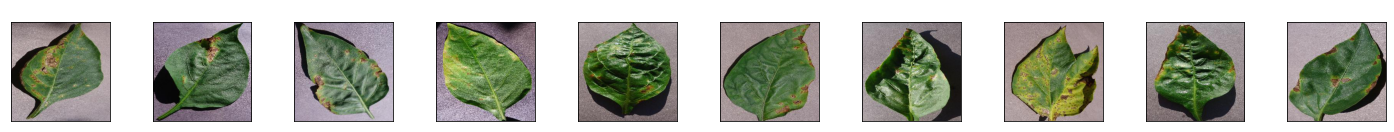

In [4]:
fig = plt.figure(figsize=(25, 4))
for i in range(10):
    image, label = data[i]
    ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks = [])
    ax.imshow(image.permute(1,2,0))
    ax.set_title(target_label[label], color='white')

In [5]:
count = {}

for i in range(len(data)):
    _, labels = data[i]
    label = target_label[labels]
    if label not in count:
        count[label] = 1
    elif label in count:
        count[label] += 1

df = pd.DataFrame(count, index=np.arange(1))
df = df.transpose().reset_index()
df.columns = ['Label', 'count']
df

,Label,count
0,Pepper_Bacterial,997
1,Pepper_healthy,1478
2,Potato_Early_blight,1000
3,Potato_healthy,1000
4,Potato_Late_blight,152
5,Tomato_Bacterial,2127
6,Tomato_Curl_Virus,3208
7,Tomato_Early_blight,1000
8,Tomato_healthy,1909
9,Tomato_Late_blight,952


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

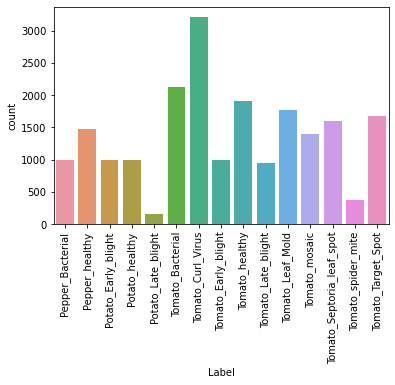

In [13]:
sns.barplot(df['Label'],df['count'])
plt.xticks(rotation=90)

Looking at the data, it is clear that the Tomato data makes up the majority of it. The most common photos are Tomato leaves with Curl Virus 

In [11]:
height = []
weight = []
for i in range(len(data)):
    image, label = data[i]
    height.append(image.size(1))
    weight.append(image.size(2))
print(f"maximum_height:{np.max(height)} \tminimum_height:{np.min(height)} \tmean_height:{np.mean(height)}")
print(f"maximum_weight:{np.max(weight)} \tminimum_weight:{np.min(weight)} \tmean_weight:{np.mean(weight)}")

maximum_height:256 	minimum_height:256 	mean_height:256.0
maximum_weight:256 	minimum_weight:256 	mean_weight:256.0


It looks like all images are the same size.